## **ANALISIS DE LOS DATOS: SENTIMIENTOS Y AGRESIÓN EN COMENTARIOS DE YOUTUBE**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
ruta_archivo = os.path.join('..', "data", "processed", "dfscore_2.csv")
df = pd.read_csv(ruta_archivo)


In [3]:
# Eliminamos los neutrales
df = df[df['Sentimiento'].isin(['Positivo', 'Negativo'])]
df.head(2)

,comment_id,comment,user_id,user_name,comment_time,comment_likes,total_reply_count,is_top_level_comment,video_title,channel_title,...,relacion_evento,evento,tipo_evento,condiciones_cuenta,duration_timedelta,duration_seconds,translated_text,polarity,Sentimiento,contiene_insulto
0,UgwZJGlfpFvs-r_l-hB4AaABAg,Esta vieja esta más loca cómo una cabra..😂😂😂,UC7s8hGLBfkLOzpho73qs4FQ,@siulenlo8728,2024-08-15 02:14:26+00:00,0,0,True,MILEI SE CRUZÓ MAL CON PERIODISTA QUE NO PARÓ ...,El Peluca Milei,...,No,Primer paro nacional,Desfavorable,A favor,0 days 00:41:21,2481.0,This old lady is as crazy as a goat..😂😂😂,-0.25,Negativo,No insulta
1,UgyEy8OvhoFZrm5GJdd4AaABAg,Cuanto tiempo?,UCAHJ7ysRA9VnBb7JsHBcYPQ,@Raul-bb3nc,2024-05-18 04:07:18+00:00,0,0,True,MILEI SE CRUZÓ MAL CON PERIODISTA QUE NO PARÓ ...,El Peluca Milei,...,No,Primer paro nacional,Desfavorable,A favor,0 days 00:41:21,2481.0,How long?,-0.05,Negativo,No insulta


# 1. Análisis de sentimientos

## 1.1 Sentimientos según tipo de cuenta

Se depsrende un primer acercamiento a los datos en el análisis de la variable _condiciones_cuenta_, la cual, como se ha dicho, releva el tipo de acercamiento o condición que tiene la cuenta frente al gobierno de Javier Milei: esto implica tres posicionamientos posibles, en contra, a favor  o neutral. 

Ahora bien, como se visualiza en el gráfico y tabla de debajo, se encuentran resultados consistentes con lo que intuitivamente se esperaría: los sentimientos positivos son mayores en las cuentas a favor del gobierno (69,8%), seguido por las cuentas neutras (65,3%) y por último las que están en contra (60,1%), habiendo así una brecha de positividad emocional del 9,7% entre las cuentas a favor y en contra, lo que implica un comportamiento inversamente proporcional en las emociones negativas. 

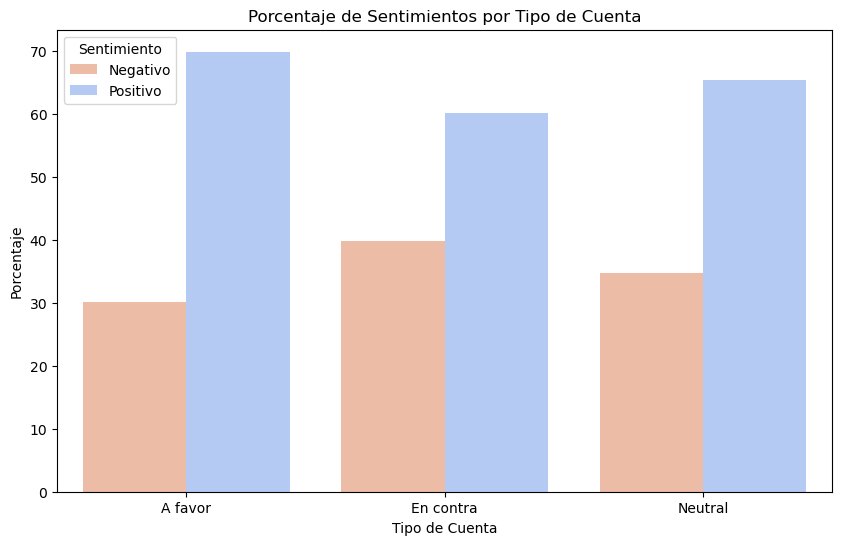

In [41]:
sentiment_counts = df.groupby(['condiciones_cuenta', 'Sentimiento']).size().reset_index(name='count')

# Calculamos el total de comentarios por cada tipo de cuenta
total_counts = df.groupby('condiciones_cuenta').size().reset_index(name='total')

# Unimos ambos DataFrames para obtener los porcentajes
df_percentage = pd.merge(sentiment_counts, total_counts, on='condiciones_cuenta')
df_percentage['percentage'] = (df_percentage['count'] / df_percentage['total']) * 100

# Ahora graficamos los resultados usando seaborn para hacerlo visualmente atractivo

plt.figure(figsize=(10, 6))
sns.barplot(data=df_percentage, x='condiciones_cuenta', y='percentage', hue='Sentimiento', palette= 'coolwarm_r')


# Ajustamos el título y las etiquetas
plt.title('Porcentaje de Sentimientos por Tipo de Cuenta')
plt.ylabel('Porcentaje')
plt.xlabel('Tipo de Cuenta')
    
# Mostramos el gráfico
plt.show()

In [34]:
#Porcentajes por tipo de cuenta
df_percentage

,condiciones_cuenta,Sentimiento,count,total,percentage
0,A favor,Negativo,7414,24604,30.133312
1,A favor,Positivo,17190,24604,69.866688
2,En contra,Negativo,6927,17372,39.874511
3,En contra,Positivo,10445,17372,60.125489
4,Neutral,Negativo,3508,10113,34.688025
5,Neutral,Positivo,6605,10113,65.311975


## 1.2. Sentimientos según tipo de evento

Cuando se analizan los sentimientos en función del tipo de evento, esto es, si es un evento relevado como desvaforable, favorable o neutral para el gobierno, nos encontramos con un comportamiento igualmente esperable: los eventos favorables registran una mayor sentimentalidad positiva (68,22%) frente a los eventos desfavorables (63,05%). O, dicho de otro modo, los eventos desfavorables implican un incremento porcentual, con respecto a los favorables, del 16,14% (pasando, pues, del 31,77% en eventos favorables al 36,96% en eventos desfavorables). 

Un dato a considerar es que, sin embargo, el mayor nivel de positividad corresponde a los eventos neutros (72,03%), que, sin embargo, se pueden explicar a través del sesgo de la muestra neutral: estos días son, en definitiva, días festivos. 

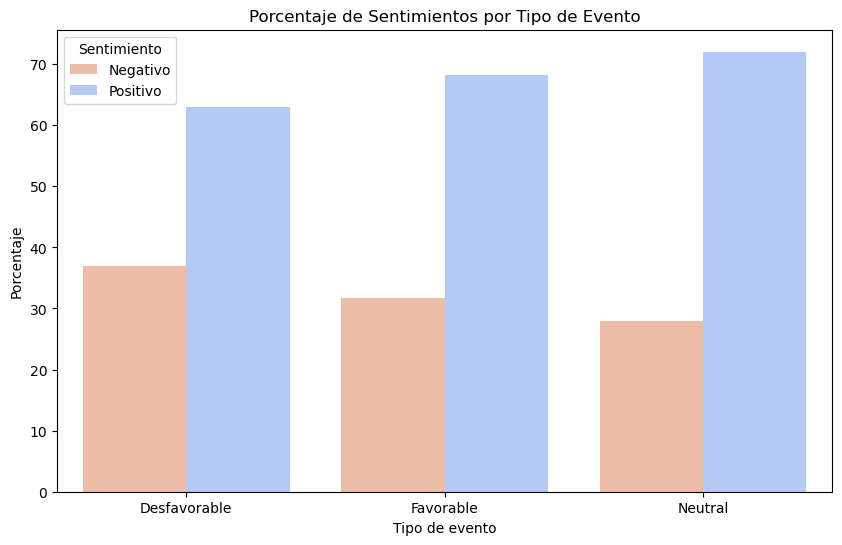

In [86]:
sentiment_counts_evento = df.groupby(['tipo_evento', 'Sentimiento']).size().reset_index(name='count')

# Calculamos el total de comentarios por cada tipo de cuenta
total_counts_evento = df.groupby('tipo_evento').size().reset_index(name='total')

# Unimos ambos DataFrames para obtener los porcentajes
df_percentage_evento = pd.merge(sentiment_counts_evento, total_counts_evento, on='tipo_evento')
df_percentage_evento['percentage'] = (df_percentage_evento['count'] / df_percentage_evento['total']) * 100

# Ahora graficamos los resultados usando seaborn para hacerlo visualmente atractivo

plt.figure(figsize=(10, 6))
sns.barplot(data=df_percentage_evento, x='tipo_evento', y='percentage', hue='Sentimiento', palette= 'coolwarm_r')


# Ajustamos el título y las etiquetas
plt.title('Porcentaje de Sentimientos por Tipo de Evento')
plt.ylabel('Porcentaje')
plt.xlabel('Tipo de evento')
    
# Mostramos el gráfico
plt.show()

In [45]:
df_percentage_evento

,tipo_evento,Sentimiento,count,total,percentage
0,Desfavorable,Negativo,11341,30680,36.965450
1,Desfavorable,Positivo,19339,30680,63.034550
2,Favorable,Negativo,4343,13667,31.777274
3,Favorable,Positivo,9324,13667,68.222726
4,Neutral,Negativo,2165,7742,27.964350
5,Neutral,Positivo,5577,7742,72.035650


## 1.3. Sentimientos según eventos desagregados

Resulta interesante abordar la sentimentalidad considerando cada uno de los eventos desagregados. Esto nos puede permitir entender el clima de opinión (y humor social) con mayor precisión, trascendiendo las miradas generales que hasta lo que hemos visto, nos devuelve un escenario acorde a lo que se ha medido en la mayoría de las consultoras de opinión: una solida imagen positiva del gobierno y el Presidente. 

Ahora bien, el analisis desagregado nos permite intuir donde se encuentran los focos de negatividad y rechazo al gobierno, como también teorizar sobre ciertas dinamicas de la interacción online. Así, pues, encontramos que los eventos de mayor positividad resultaron ser en su mayoría eventos favorables al gobierno o neutrales: el 25 de mayo cosechó una positividad del 78,45%, el 20 de junio un 73,56%, la aprobación de la ley bases un 69,81% y y la reunión de Milei con Elon Musk un 68,73%. Como se ha dicho, la positividad de los eventos neutrales puede deberse, mayormente, al caracter celebratorio de esas fechas. En lo que respecta a los otros casos, ese despunte de positividad responde, más bien, a una actitud directa hacia el gobierno: la _esperanza_ visualizada en la reunión del Presidente con el hombre más rico del mundo (y la imagen consecuente de un país que "se inserta en el mundo" y es validado en el camino elegido), y la _alegría_ celebratoria en torno a la efectivización de una de las banderas del gobierno en la aprobación de la Ley Bases. 

En lo referido a los casos de mayor negatividad, encontramos una pluralidad de eventos y de posibles razones detrás de la misma. En primer lugar encontramos la crisis de corrupción en el Ministerio de Capital Humano, con el 44,32%, luego el 8 de marzo con el 39,06%, el primer paro nacional con el 37,14% y el anuncio de la baja de inflación de abril con el 35,89%. De este modo, la negatividad parece ser transversal en los tipos de eventos: neutrales, desfavorables y favorables, lo que nos permite inferir que tal negatividad tiene diferentes causantes y direccionamientos. En este sentido, podemos leer el caso del Ministerio de Capital Humano en línea con sentimientos de _indiganción_ y _decepción_ frente a un hecho de corrupción y poca sensibilidad social, algo que entra en conflicto directo con el dicurso oficialista en contra de los negociados y politiquería de la casta. La lógica anteciha, propia de un evento desfavorable, no sería traspolable al caso del 8 de marzo, donde uno podría imaginar que la negatividad tiene dos fuentes: tanto el rechazo opositor a ciertas medidas o provocaciones del gobierno a los colectivos feministas (como el cierre del Salón de las Mujeres en la Casa Rosada), como también un rechazo oficialista a una fecha sensible para partidarios del antifeminismo. En lo referido al primer paro nacional, es también prudente entender que este aumento de la negatividad puede deberse tanto como a una negatividad dirigida hacia el gobierno (por las políticas que la medida de fuerza pone en discusión), como también a un rechazo hacia el paro a tan pocos días del cambio de gobierno. Y por último, la negatividad asociada al anuncio de la baja de inflación de abril es comprensible en la medida que, aún al mostrar una primera baja, la inflación seguía demostrando números altos: lo que el gobierno encuadro como un evento favorable no necesariamente es percibido así por todos.  

In [46]:
sentiment_counts_casos = df.groupby(['evento', 'Sentimiento']).size().reset_index(name='count')

# Calculamos el total de comentarios por cada tipo de cuenta
total_counts_casos = df.groupby('evento').size().reset_index(name='total')

# Unimos ambos DataFrames para obtener los porcentajes
df_percentage_casos = pd.merge(sentiment_counts_casos, total_counts_casos, on='evento')
df_percentage_casos['percentage'] = (df_percentage_casos['count'] / df_percentage_casos['total']) * 100

df_percentage_casos

,evento,Sentimiento,count,total,percentage
0,20 de junio,Negativo,539,2039,26.434527
1,20 de junio,Positivo,1500,2039,73.565473
2,24 de marzo,Negativo,974,2937,33.163092
3,24 de marzo,Positivo,1963,2937,66.836908
4,25 de mayo,Negativo,527,2446,21.545380
5,25 de mayo,Positivo,1919,2446,78.454620
6,8 de marzo,Negativo,125,320,39.062500
7,8 de marzo,Positivo,195,320,60.937500
8,Aprobación total Ley bases,Negativo,1973,6537,30.182041
9,Aprobación total Ley bases,Positivo,4564,6537,69.817959


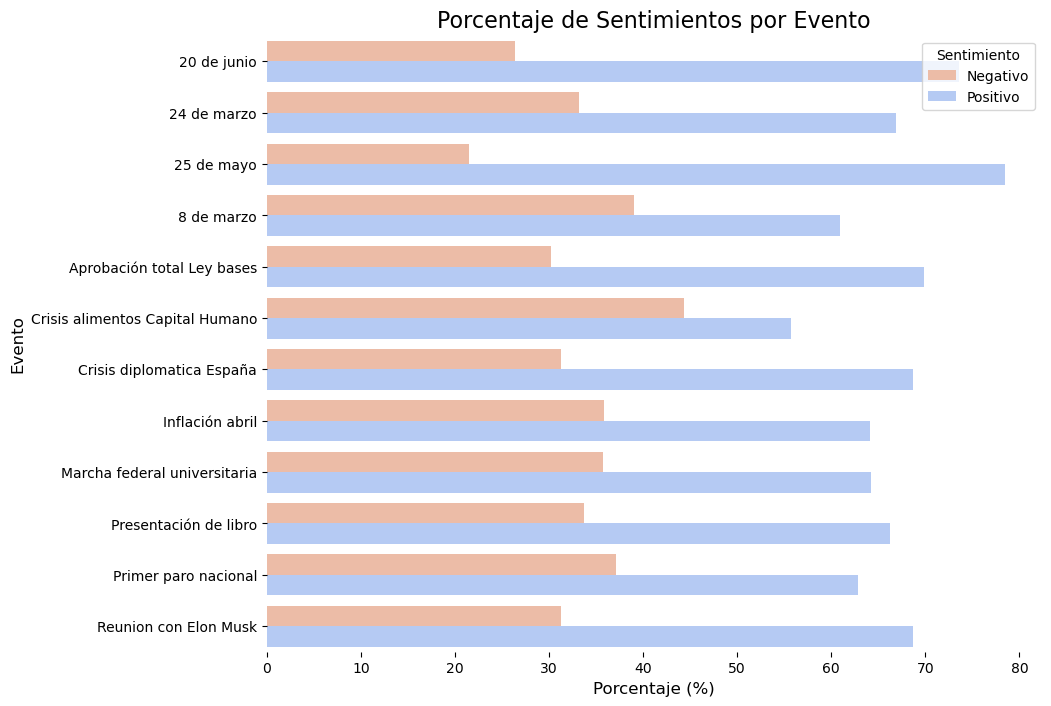

In [62]:
f, ax = plt.subplots(figsize=(10, 8))

# Usamos un gráfico de barras horizontal
sns.barplot(x="percentage", y="evento", data=df_percentage_casos,
            hue="Sentimiento", palette="coolwarm_r")  

# Ajustamos el título y las etiquetas de los ejes
ax.set_title('Porcentaje de Sentimientos por Evento', fontsize=16)
ax.set_xlabel('Porcentaje (%)', fontsize=12)
ax.set_ylabel('Evento', fontsize=12)

# Añadimos la leyenda
ax.legend(title="Sentimiento", loc="upper right")

# Eliminamos los bordes
sns.despine(left=True, bottom=True)

# Mostrar el gráfico
plt.show()

## 1.4. Tipos de eventos según la inclinación de las cuentas, o quién habla cuando las cosas andan mal

Teniendo en cuenta los fenomenos online del filtro burbuja o de cámaras de eco (Pariser, 2017; Nguyen, 2022), parece interesante y pertinente indagar sobre qué cuentas hablan sobre qué temas. Esto puede darnos matices sobre los datos generalizados, en la medida que si la mayoría de los temas desfavorables solo son hablados por cuentas opositoras, esto podría implicar un aumento de la negatividad referida a esos temas, como así también en un caso inverso. 

Así, pues, detectamos un comportamiento contraintuitivo: mientras que podría esperarse que las cuentas a favor del gobierno se destaquen por hablar mayormente de los eventos favirables a éste o bien sean las cuentas que más hablen de los eventos positivos, ésto no se dio de tal forma. Al contrario, las cuentas que menos hablaron de eventos favorables (21,94%) fueron las cuenta a favor del gobierno, siendo las cuentas neutrales aquellas que dieron más entidad a este tipo de eventos (36,20%). Esto nos permite dos cosas, por un lado inferir ciertos comportamientos online y por otro explicar ciertos datos. 

En primer lugar podemos percibir que las cuentas a favor del gobierno se comportaron de un modo comunicacional más defensivo que aclamativo (Benoit, 1999), llevando a tratar más de eventos desfavorables que favorables, con el fin de lograr un re-encuadre respecto del evento y cambiar (o diminuir) el impacto de los mismo. Y en segundo lugar esto puede explicar, al menos en parte, la mayoría de la positividad en eventos aún desfavorables: mucho de éstos es discutido por partidarios, bajo un encuadre que procura contrarrestar la carga negativa del evento. 

Es interesante, por otro lado, el tratamiento de las cuentas neutrales o los medios clásicos de comunicación: éstos, a diferencia de sus contrapartes, tuvieron una comunicación más equitativa entre los diferentes tipos de eventos, aunque dandole primacía a aquellos desfavorables. 

In [70]:
cuentas_counts = df.groupby(['tipo_evento', 'condiciones_cuenta']).size().reset_index(name='count')

# Calculamos el total de comentarios por cada tipo de cuenta
condiciones_counts = df.groupby('condiciones_cuenta').size().reset_index(name='total')

# Unimos ambos DataFrames para obtener los porcentajes
df_percentage_cuentas = pd.merge(cuentas_counts, condiciones_counts, on='condiciones_cuenta')
df_percentage_cuentas['percentage'] = (df_percentage_cuentas['count'] / df_percentage_cuentas['total']) * 100

df_percentage_cuentas

,tipo_evento,condiciones_cuenta,count,total,percentage
0,Desfavorable,A favor,14623,24604,59.433425
1,Favorable,A favor,5400,24604,21.947651
2,Neutral,A favor,4581,24604,18.618924
3,Desfavorable,En contra,11357,17372,65.375317
4,Favorable,En contra,4606,17372,26.513930
5,Neutral,En contra,1409,17372,8.110753
6,Desfavorable,Neutral,4700,10113,46.474834
7,Favorable,Neutral,3661,10113,36.200929
8,Neutral,Neutral,1752,10113,17.324236


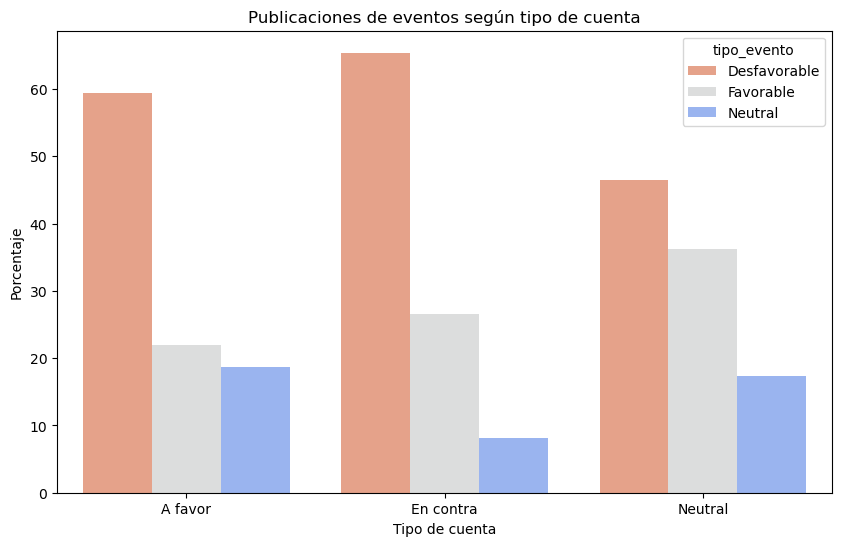

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_percentage_cuentas, x='condiciones_cuenta', y='percentage', hue='tipo_evento', palette= 'coolwarm_r')


# Ajustamos el título y las etiquetas
plt.title('Publicaciones de eventos según tipo de cuenta')
plt.ylabel('Porcentaje')
plt.xlabel('Tipo de cuenta')
    
# Mostramos el gráfico
plt.show()

# 2. Análisis de agresividad discursiva

## 2.1. Agresividad discursiva según tipo de cuenta

En primer lugar, nos dedicamos a analizar la agresividad en función de los diferentes tipos de cuentas. De éste modo, pudimos encontrar algo que a priori resulta contraintuitivo: el nivel de agresión es mayor en las cuentas militantes que en las opositoras, teniendo un porcentaje de crecimiento del 38,96% (4,53% vs. 3,26%). 

Esto puede deberse justamente a que, como se vio anteriormente, el comportamiento de las cuentas a favor del gobierno fue hablando mayormente de temas desfavorables, discutiendo su narrativa, lo que pudo generar focos de agresión hacia el adversario político. Tampoco se puede descartar la posibilidad, planteada por ciertos autores (Ruocco, 2022), que las dinámicas de interacción online de los partidos de ultraderecha suelen ser caracterizadas por un grado de violencia mayor. De todos modos, ésto, como otros datos, debieran ser complementados con un abordaje cualitativo a fin de precisar ciertos mecanismos causales, lo cual excede a este informe. 

In [78]:
insult_counts = df.groupby(['condiciones_cuenta', 'contiene_insulto']).size().reset_index(name='count')

# Calculamos el total de comentarios por cada tipo de cuenta
total_counts = df.groupby('condiciones_cuenta').size().reset_index(name='total')

# Unimos ambos DataFrames para obtener los porcentajes
df_percentage_insult = pd.merge(insult_counts, total_counts, on='condiciones_cuenta')
df_percentage_insult['percentage'] = (df_percentage_insult['count'] / df_percentage_insult['total']) * 100

df_percentage_insult

,condiciones_cuenta,contiene_insulto,count,total,percentage
0,A favor,Insulta,1115,24604,4.531783
1,A favor,No insulta,23489,24604,95.468217
2,En contra,Insulta,568,17372,3.269629
3,En contra,No insulta,16804,17372,96.730371
4,Neutral,Insulta,242,10113,2.392960
5,Neutral,No insulta,9871,10113,97.607040


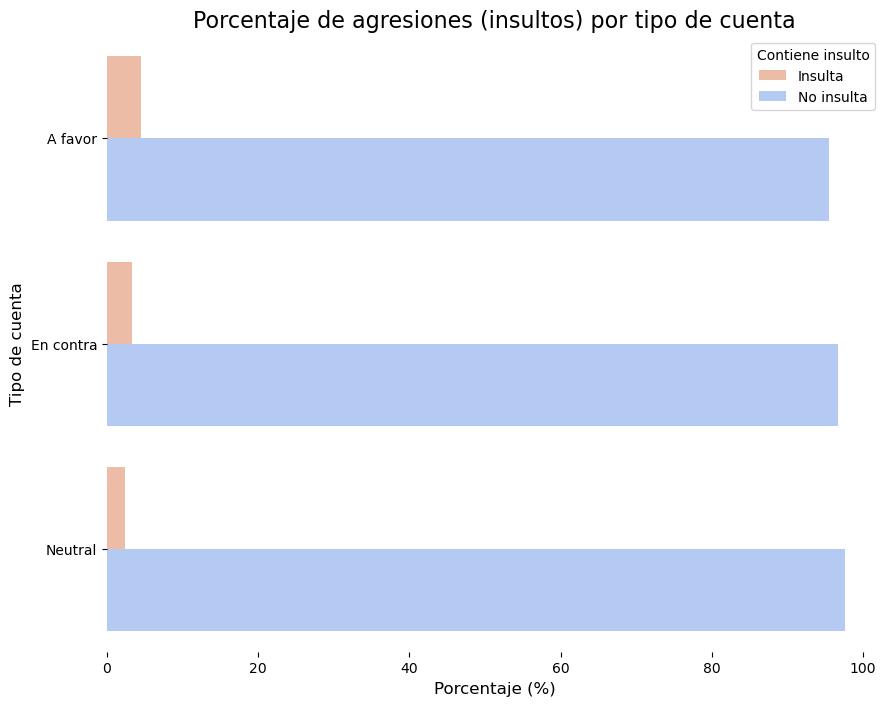

In [80]:
f, ax = plt.subplots(figsize=(10, 8))

# Usamos un gráfico de barras horizontal
sns.barplot(x="percentage", y="condiciones_cuenta", data=df_percentage_insult,
            hue="contiene_insulto", palette="coolwarm_r")  

# Ajustamos el título y las etiquetas de los ejes
ax.set_title('Porcentaje de agresiones (insultos) por tipo de cuenta', fontsize=16)
ax.set_xlabel('Porcentaje (%)', fontsize=12)
ax.set_ylabel('Tipo de cuenta', fontsize=12)

# Añadimos la leyenda
ax.legend(title="Contiene insulto", loc="upper right")

# Eliminamos los bordes
sns.despine(left=True, bottom=True)

# Mostrar el gráfico
plt.show()

## 2.2. Agresividad discursiva según tipo de evento

En lo referido a éste cruce, a diferencia del anterior, se detecta un comportamiento esperado: la agresividad (los insultos) aumentan frente a eventos desfavorables vs eventos favorables o neutrales. De éste modo, la agresividad mide un 3,04% en eventos neutrales, un 3,49% en eventos favorables y un 3,94% en eventos desfavorables. Esto se complementa con hallazgos anteriores: los eventos desfavorables impulsan una reacción emocional negativa en general, lo que, como vemos, incluye reacciones agresivas, propias a la ira o incluso el odio. 

In [81]:
insult_counts_evento = df.groupby(['tipo_evento', 'contiene_insulto']).size().reset_index(name='count')

# Calculamos el total de comentarios por cada tipo de cuenta
total_counts_eventoins = df.groupby('tipo_evento').size().reset_index(name='total')

# Unimos ambos DataFrames para obtener los porcentajes
df_percentage_insult_evento = pd.merge(insult_counts_evento, total_counts_eventoins, on='tipo_evento')
df_percentage_insult_evento['percentage'] = (df_percentage_insult_evento['count'] / df_percentage_insult_evento['total']) * 100

df_percentage_insult_evento

,tipo_evento,contiene_insulto,count,total,percentage
0,Desfavorable,Insulta,1211,30680,3.947197
1,Desfavorable,No insulta,29469,30680,96.052803
2,Favorable,Insulta,478,13667,3.497476
3,Favorable,No insulta,13189,13667,96.502524
4,Neutral,Insulta,236,7742,3.048308
5,Neutral,No insulta,7506,7742,96.951692


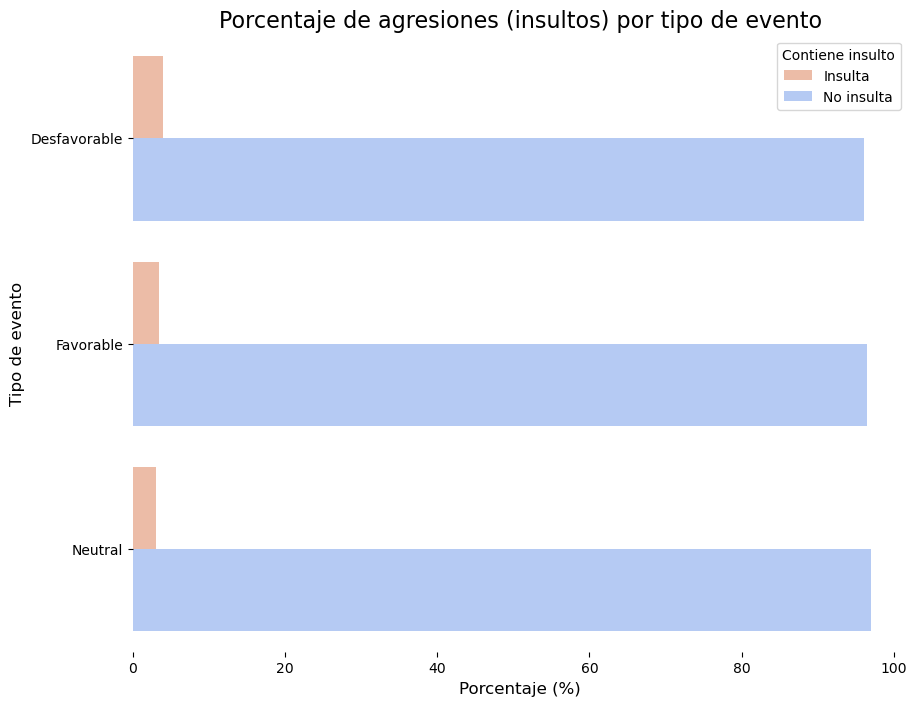

In [83]:
f, ax = plt.subplots(figsize=(10, 8))

# Usamos un gráfico de barras horizontal
sns.barplot(x="percentage", y="tipo_evento", data=df_percentage_insult_evento,
            hue="contiene_insulto", palette="coolwarm_r")  

# Ajustamos el título y las etiquetas de los ejes
ax.set_title('Porcentaje de agresiones (insultos) por tipo de evento', fontsize=16)
ax.set_xlabel('Porcentaje (%)', fontsize=12)
ax.set_ylabel('Tipo de evento', fontsize=12)

# Añadimos la leyenda
ax.legend(title="Contiene insulto", loc="upper right")

# Eliminamos los bordes
sns.despine(left=True, bottom=True)

# Mostrar el gráfico
plt.show()

## 2.3. Agresividad discursiva según eventos desagregados

El desagregado por eventos relevados nos permite encontrar que los eventos que más agresión discursiva implicaron fueron la presentación del libro del Presidentre con 4,45%, la crisis diplómatica con España con 4,35% y la reunión con Elon Musk con 4,04%. Una consideración es que, dado el nivel de positividad elevado que presento el tratamiento de la crisis diplómatica con España (68,74% según lo visto anteriormente) es coherente pensar que parte de la agresividad discursiva se puede dirigir no hacia el gobierno sino más bien a su contraparte española. 

Respecto a los eventos con menos agresión, no sorprende que el segundo sea el 25 de mayo con el 1,92%. Sin embargo es interesante que el de menor agresión sea el anuncio de inflación de abril con el 1,39%, lo que permite inferir que, a pesar de  ser uno de los eventos que mayor emocionalidad negativa despertó, esta sin embargo, fue de una menor intensidad.

In [84]:
insult_counts_caso = df.groupby(['evento', 'contiene_insulto']).size().reset_index(name='count')


total_counts_casoins = df.groupby('evento').size().reset_index(name='total')

# Unimos ambos DataFrames para obtener los porcentajes
df_percentage_insult_caso = pd.merge(insult_counts_caso, total_counts_casoins, on='evento')
df_percentage_insult_caso['percentage'] = (df_percentage_insult_caso['count'] / df_percentage_insult_caso['total']) * 100

df_percentage_insult_caso

,evento,contiene_insulto,count,total,percentage
0,20 de junio,Insulta,78,2039,3.825405
1,20 de junio,No insulta,1961,2039,96.174595
2,24 de marzo,Insulta,101,2937,3.438883
3,24 de marzo,No insulta,2836,2937,96.561117
4,25 de mayo,Insulta,47,2446,1.921504
5,25 de mayo,No insulta,2399,2446,98.078496
6,8 de marzo,Insulta,10,320,3.125000
7,8 de marzo,No insulta,310,320,96.875000
8,Aprobación total Ley bases,Insulta,181,6537,2.768854
9,Aprobación total Ley bases,No insulta,6356,6537,97.231146


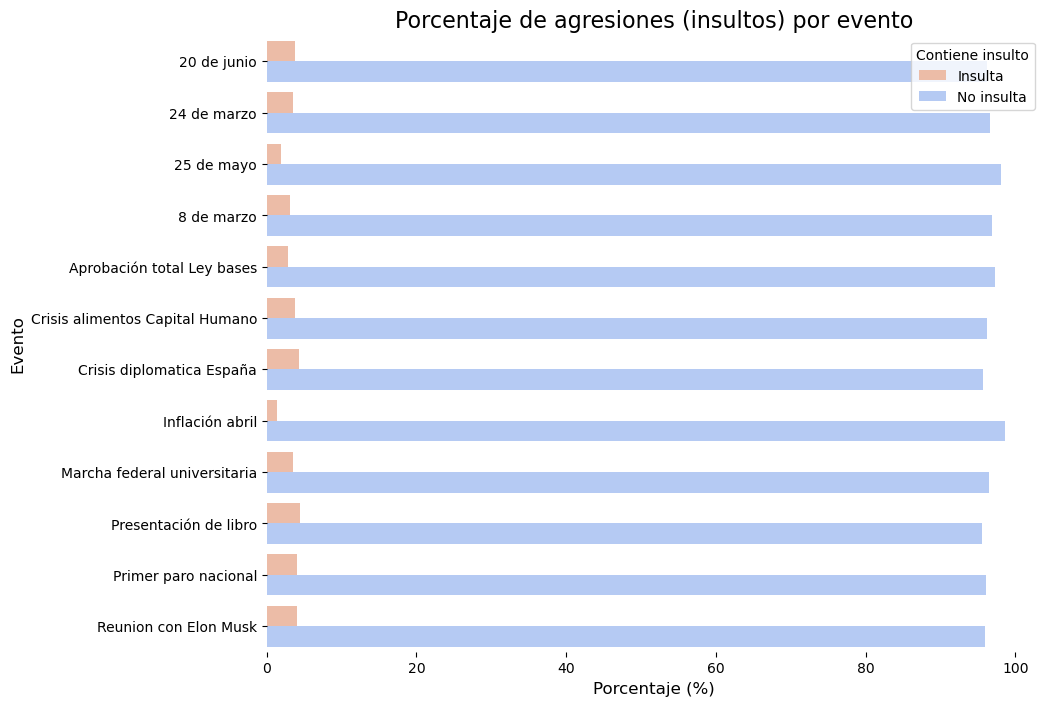

In [85]:
f, ax = plt.subplots(figsize=(10, 8))

# Usamos un gráfico de barras horizontal
sns.barplot(x="percentage", y="evento", data=df_percentage_insult_caso,
            hue="contiene_insulto", palette="coolwarm_r")  

# Ajustamos el título y las etiquetas de los ejes
ax.set_title('Porcentaje de agresiones (insultos) por evento', fontsize=16)
ax.set_xlabel('Porcentaje (%)', fontsize=12)
ax.set_ylabel('Evento', fontsize=12)

# Añadimos la leyenda
ax.legend(title="Contiene insulto", loc="upper right")

# Eliminamos los bordes
sns.despine(left=True, bottom=True)

# Mostrar el gráfico
plt.show()

## 3. Hallagzos generales

La lectura de los datos anterior nos permite aproximarnos a los climas de opinión y humor social en los primeros 200 días del gobierno de Milei. Podemos percibir, al igual que lo han afirmado diferentes consultoras, que la opinión hacia el gobierno y el humor social lejos de tornarse negativa mantiene altos grados de positividad a pesar de los diferentes avatares políticos y económicos. Esto podemos percibirlo a través de los porcentajes mayoritarios de positividad emocional y los bajos niveles de agresión discursiva. Sin embargo, un analisis más profundo nos perfmite acceder a ciertos matices a lo antedicho, como también a ciertos insights relevantes para la comprensión de la interacción online. 

En este sentido, la positividad generalizada debe tener en consideración que, de todos modos, ciertos temas parecieran ser más sensibles que otros. La polémica con el Ministerio de Capital Humano, por ejemplo, da cuenta de un potencial peligro para el gobierno: mientras que otros eventos desfavorables se mantienen en niveles altos, éste se dispara con mayor fuerza, lo que nos permite comprender que éste tipo de eventos son de especial sensibilidad. Así, pues, aquellos eventos que pongan en cuestión las banderas políticas del gobierno (por sobre todo, lo _anticasta_) despiertan mayor rechazo. El encadenamiento de eventos así pareciera ser más peligroso que el encadenamieto de eventos más bien relacionados con el ajuste (como la marcha universitaria). 

Por otro lado, una lectura de relevancia es la que nos permitió captar que la posición de las cuentas militantes del gobierno es más bien una posición defensiva, retomando en su mayoría los eventos desfavorables pero en una clave distinta. Esto da cuenta de cierta estrategia comunicacional, pero además puede explicar ciertos niveles de positividad emocional a la hora de enfrentarse a los eventos desfavorables. 

Al mismo tiempo, el abordaje de la agresividad nos permite comprender que ésta permanece relativamente baja, en consonancia con los niveles de negatividad emocional. Ahora bien, el dato de mayor relevancia probablemente sea que el menor nivel de agresión se presenta, como se vio, en el anuncio de la inflación de abril. 

Así, de este modo, se bosqueja un escenario donde podemos percibir los eventos de mayor peligrosidad para la opinión a favor del gobierno en aquellos eventos que van en contra de su narrativa y los eventos que reducen la agresividad (y en consecuencia, quizá a futuro, la negatividad) como son los anuncios favorables consistentes, justamente, con su narrativa. Estos datos pueden ser indicadores relativos de la pregnancia y fe en el discurso presidencial, ya que sus puntos altos de positividad y baja de agresión se corresponden a aquellos eventos en sintonía con la narrativa de Milei, mientras que aquellos que despiertan una negatividad anomala son aquellos que se desvían de esa narrativa. 